In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Set plot style
plt.style.use('ggplot')

In [14]:
# Load the dataset
df = pd.read_csv('../data/processed/final_model_ready_data.csv')

# Select the features required for our 65% target
features = ['HTP', 'ATP', 'HTGD', 'ATGD', 'DiffPts', 'HTFormPts', 'ATFormPts', 'B365H', 'B365D', 'B365A']
X = df[features]
y = df['FTR_Binary']

# STRICT 80/20 CHRONOLOGICAL SPLIT
# We train on the past (80%) and test on the most recent matches (20%)
split_idx = int(len(df) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Scaling the features
# (Essential for KNN because it calculates distance between points)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(f"Total Matches: {len(df)}")
print(f"Training on: {len(X_train)} matches")
print(f"Testing on: {len(X_test)} matches (20% of data)")

Total Matches: 8020
Training on: 6416 matches
Testing on: 1604 matches (20% of data)


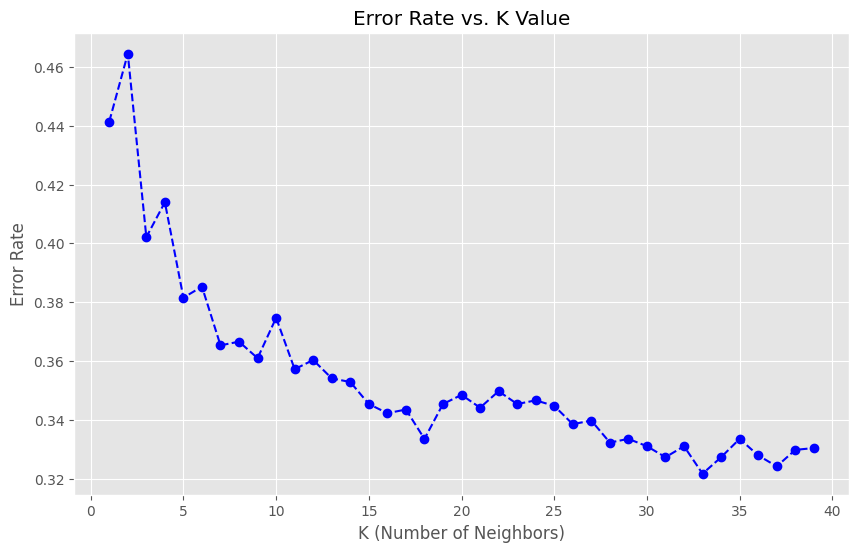

In [15]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s, y_train)
    pred_i = knn.predict(X_test_s)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.show()

KNN Accuracy on 20% Test Data: 65.52%


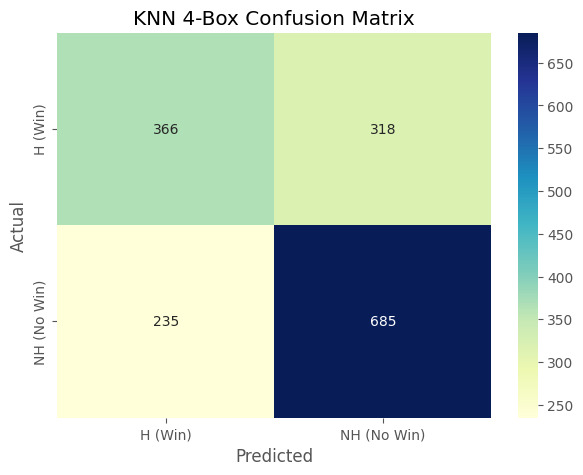

In [16]:
# Train the model with optimal K
knn_final = KNeighborsClassifier(n_neighbors=25)
knn_final.fit(X_train_s, y_train)

# Get Predictions for the 20% test data
y_pred = knn_final.predict(X_test_s)

# Show Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy on 20% Test Data: {acc:.2%}")

# Display the 4-Box Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['H (Win)', 'NH (No Win)'], 
            yticklabels=['H (Win)', 'NH (No Win)'])
plt.title('KNN 4-Box Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Save the trained KNN model
joblib.dump(knn_final, 'knn_model.pkl')

# Save the scaler (The app MUST use the same scaling as the training)
joblib.dump(scaler, 'scaler.pkl')

print("Files 'knn_model.pkl' and 'scaler.pkl' saved in the models/ folder.")

Files 'knn_model.pkl' and 'scaler.pkl' saved in the models/ folder.
